In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import svm

In [ ]:
ai=pd.read_csv('/content/drive/MyDrive/jcaiml.csv')

In [ ]:
ml=ai.fillna(0)
print(ml.isna())

     GENDER    AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0     False  False    False           False    False          False   
1     False  False    False           False    False          False   
2     False  False    False           False    False          False   
3     False  False    False           False    False          False   
4     False  False    False           False    False          False   
..      ...    ...      ...             ...      ...            ...   
305   False  False    False           False    False          False   
306   False  False    False           False    False          False   
307   False  False    False           False    False          False   
308   False  False    False           False    False          False   
309   False  False    False           False    False          False   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0              False     False     False     False              False   
1

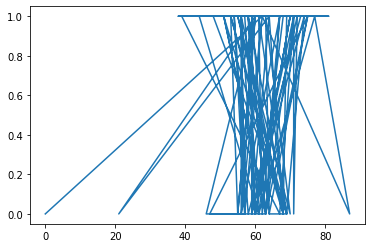

In [ ]:
x1=ml['AGE']
y=ml['LUNG_CANCER']
plt.plot(x1,y)

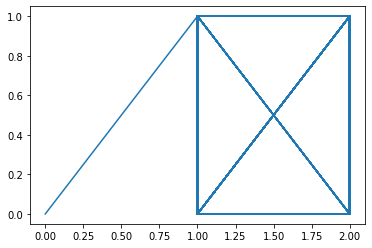

In [ ]:
x2=ml['SMOKING']
y=ml['LUNG_CANCER']
plt.plot(x2,y)

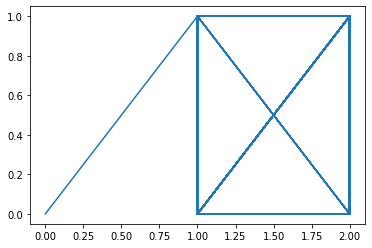

In [ ]:
x3=ml['YELLOW_FINGERS']
y=ml['LUNG_CANCER']
plt.plot(x3,y)

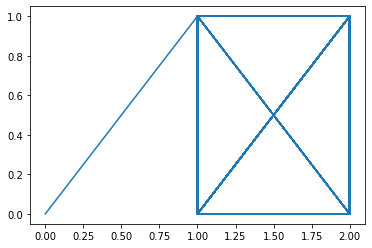

In [ ]:
x4=ml['ANXIETY']
y=ml['LUNG_CANCER']
plt.plot(x4,y)

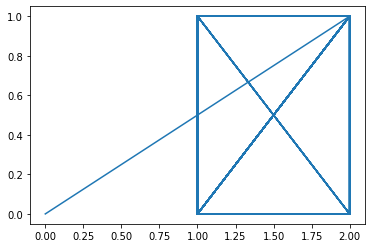

In [ ]:
x5=ml['PEER_PRESSURE']
y=ml['LUNG_CANCER']
plt.plot(x5,y)

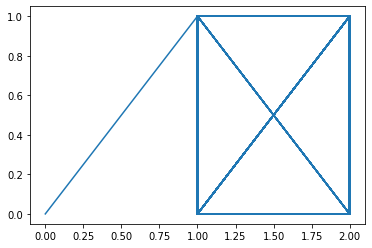

In [ ]:
x6=ml['CHRONIC DISEASE']
y=ml['LUNG_CANCER']
plt.plot(x6,y)

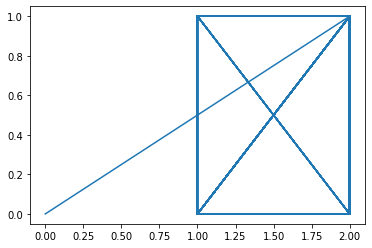

In [ ]:
x7=ml['FATIGUE ']
y=ml['LUNG_CANCER']
plt.plot(x7,y)

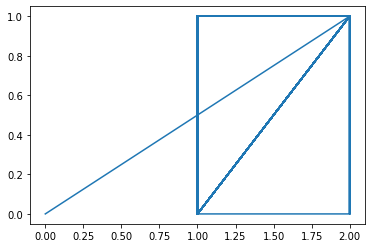

In [ ]:
x8=ml['ALLERGY ']
y=ml['LUNG_CANCER']
plt.plot(x8,y)

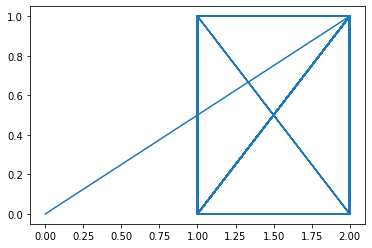

In [ ]:
x9=ml['WHEEZING']
y=ml['LUNG_CANCER']
plt.plot(x9,y)

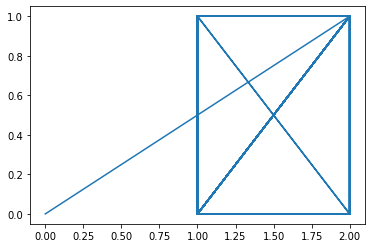

In [ ]:
x10=ml['ALCOHOL CONSUMING']
y=ml['LUNG_CANCER']
plt.plot(x10,y)

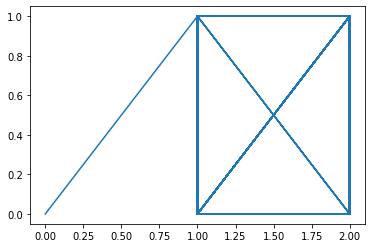

In [ ]:
x11=ml['COUGHING']
y=ml['LUNG_CANCER']
plt.plot(x11,y)

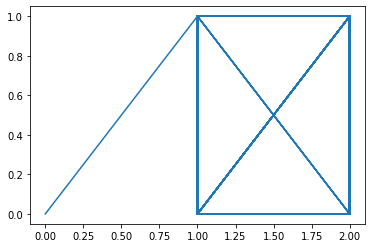

In [ ]:
x12=ml['SHORTNESS OF BREATH']
y=ml['LUNG_CANCER']
plt.plot(x12,y)

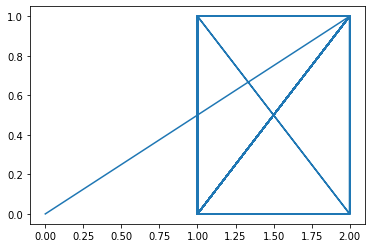

In [ ]:
x13=ml['SWALLOWING DIFFICULTY']
y=ml['LUNG_CANCER']
plt.plot(x13,y)

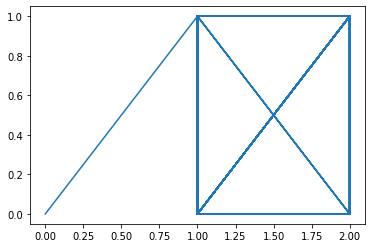

In [ ]:
x14=ml['CHEST PAIN']
y=ml['LUNG_CANCER']
plt.plot(x14,y)

[1.4329792912729316, 1.1985341500895599, 1.184057159655058, 1.1697719230825019, 1.141756852041366, 1.128017563136086, 1.114451100061426, 1.101053168840172, 1.0878196335637027, 1.0747465087275787, 1.0618299520261094, 1.0490662575733085, 1.0364518495203134, 1.0239832760417644, 1.0116572036658438, 1.0116572036658438, 0.9994704119246715, 0.987419788303581, 0.9755023234694583, 0.9755023234694583, 0.9637151067598426, 0.9637151067598426, 0.9520553219158775, 0.9405202430434538, 0.9405202430434538, 0.9405202430434538, 0.9291072307880663, 0.9291072307880663, 0.9178137287099492, 0.9178137287099492, 0.9178137287099492, 0.9066372598470384, 0.9066372598470384, 0.9066372598470384, 0.9066372598470384, 0.8955754234542014, 0.8955754234542014, 0.8955754234542014, 0.8955754234542014, 0.8955754234542014, 0.8955754234542014, 0.8846258919079987, 0.8846258919079987, 0.8846258919079987, 0.8846258919079987, 0.8846258919079987, 0.8846258919079987, 0.8846258919079987, 0.8846258919079987, 0.8846258919079987, 0.884

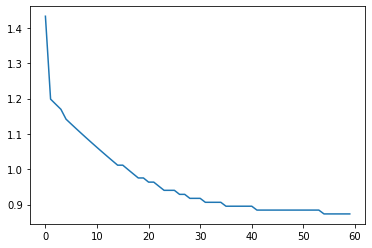

In [ ]:
#logistic regression
w_values=[]
error_rate=[]
def Linear(w):
    data=pd.read_csv('/content/drive/MyDrive/AIMLJCOMPNENT.csv')
    data_x=data.iloc[:,0:15]
    data_y=data.iloc[:,15]
    data_x=data_x.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
    data_x.insert(0,'w0',1)
    x=np.array(data_x)
    y=np.array(data_y)
    #print(data_x)
    #print(data_y)
    y_predict=[]
    for i in range(0,309):
        c=0
        for j in range(0,len(w)):
            c+=w[j]*x[i][j]
        y_predict.append(c)
        w_values.append(w)
    y_f_x=[]
    for i in range(0,309):
        den=(1+math.exp(-y_predict[i]))
        val=1/den
        y_f_x.append(round(val,2))
    j_theta=[]
    for i in range(0,309):
        if (y_f_x[i]!=0):
            j_theta.append((y[i]*np.log2(y_f_x[i]))+(1-y[i])*(1-np.log2(y_f_x[i])))
        else:
            j_theta.append(0)
    j_t_sum=np.array(j_theta).mean()
      # print(round(j_t_sum,3))
    error_rate.append(j_t_sum)
    y_grad=[]
    for j in range(0,16):
        x_g=0
        for i in range(0,309):
            x_g+=(x[i][j]*(y[i]-y_f_x[i]))
        y_grad.append(x_g)
    new_y=[]
    for j in range(0,16):
        new_y.append(round(w[j]-(0.1)*(1/303)*y_grad[j],4))
        return new_y
w=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
for i in range(60):
    w=Linear(w)
print(error_rate)
z=np.array(error_rate).min()
index=error_rate.index(z)
print(w_values[index])
print(index)
#min value 0.8737864077669902
iter=np.arange(60)
plt.plot(iter,error_rate)

In [ ]:
d=pd.read_csv('/content/drive/MyDrive/AIMLJCOMPNENT.csv')
d=d.fillna(0)

In [ ]:
x=d.iloc[:,0:15]
y=d.iloc[:,15:16]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

In [ ]:
print(x_train)

     GENDER  AGE  S0OKING  YELLOW_1INGERS  ANXIETY  PEER_PRESSURE  \
127       0   58        2               2        2              2   
97        0   59        2               1        1              2   
142       0   65        2               2        2              2   
50        1   56        1               1        1              2   
106       1   61        2               2        2              2   
..      ...  ...      ...             ...      ...            ...   
199       1   55        2               1        1              2   
155       0   75        2               2        2              2   
156       0   47        2               2        1              1   
133       0   76        2               1        1              1   
245       0   59        1               1        1              2   

     CHRONIC DISEASE  1ATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSU0ING  \
127                2         1         1         1                  2   
97                 1     

In [ ]:
print(x_test)

     GENDER  AGE  S0OKING  YELLOW_1INGERS  ANXIETY  PEER_PRESSURE  \
80        1   58        1               1        1              1   
52        1   54        2               1        1              2   
254       0   74        1               2        1              1   
170       0   54        1               2        1              2   
264       0   70        2               1        1              1   
..      ...  ...      ...             ...      ...            ...   
200       1   63        1               1        1              2   
30        1   57        2               2        1              1   
121       0   64        1               1        1              1   
249       0   68        2               1        2              1   
282       0   46        1               2        2              1   

     CHRONIC DISEASE  1ATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSU0ING  \
80                 1         2         1         1                  1   
52                 1     

In [ ]:
print(y_train)

     LUNG_CANCER
127            0
97             0
142            0
50             0
106            0
..           ...
199            0
155            0
156            1
133            0
245            1

[247 rows x 1 columns]


In [ ]:
print(y_test)

     LUNG_CANCER
80             1
52             0
254            0
170            0
264            0
..           ...
200            0
30             1
121            0
249            1
282            1

[62 rows x 1 columns]


In [ ]:
dt=DecisionTreeClassifier()
cc=dt.fit(x_train,y_train)
yt=cc.predict(x_test)
print(accuracy_score(yt,y_test))

0.9193548387096774


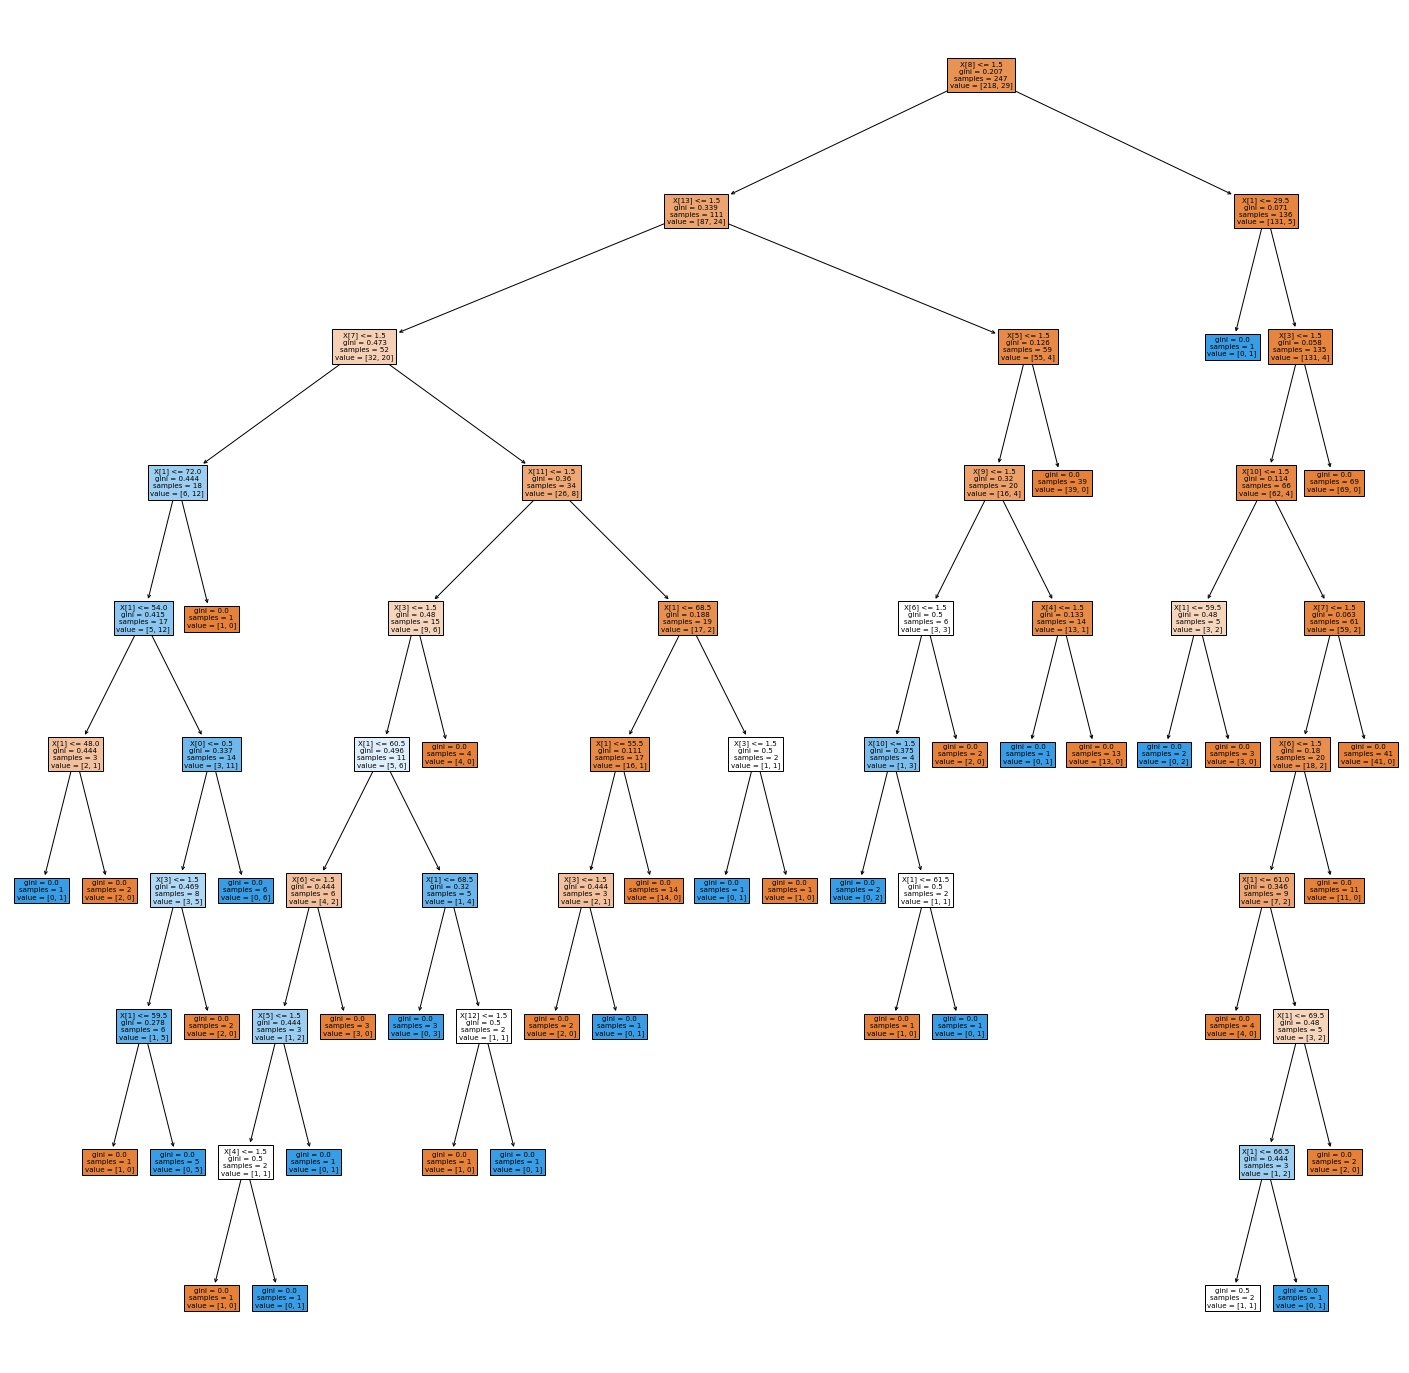

In [ ]:
#tree.plot_tree(cc)
fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(cc,filled=True)

In [ ]:
#support vector machine
cc=svm.SVC(kernel='linear')
cl=cc.fit(x_train,y_train)
yp=cl.predict(x_test)
print(yp)
print(accuracy_score(y_test,yp))

[1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1]
0.9193548387096774


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
